# Assignment 2. Data Acquirance and Statistical Tests

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2024)*  

*For your questions refer to mehrshadtaji61@gmail.com or @m522t on Telegram*

### Description
In the first part of this homework, you are going to get familiar with Python tools used for web scraping and data crawling. Next, you will thoroughly investigate the tools and methods frequently used in statistics.

### Information  
Complete the information box below.

In [ ]:
full_name = "Parham Gilani"
student_id = "400101859"

### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ss
import re
import string
from bs4 import BeautifulSoup
import sqlite3
import requests
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_ind, f_oneway, pearsonr, spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import time
import warnings

warnings.filterwarnings('ignore')
# ====================================
# feel free to import any other package
# ====================================

## 1. NBA Leaders!

The <b><a href="https://global.nba.com/"> NBA official website</a></b> offers the latest news on players, teams, and playoffs for basketball fans. For this task, we'll focus solely on players from the 2024-2025 season. Our plan is to scrape the freely available data from the site and then analyze it statistically.

### 1.1 Crawling Season Leaders Data

Inspect the webpage at https://global.nba.com/statistics/

It contains the top 50 season leaders along with their statistics. The columns in the table represent the following :

* RANK: The player's current ranking
* PLAYER: The player's name
* TEAM: The player's current team
* G: Games played
* GS: Games started
* PPG: Points per game
* RPG: Rebounds per game
* APG: Assists per game
* MPG: Minutes played per game
* EFF: Efficiency rating, a measure of overall statistical contribution
* FG%: Field goal percentage (how often a player makes a shot)
* 3P%: 3-point field goal percentage
* FT%: Free throw percentage
* OFF: Offensive rebounds per game
* DEF: Defensive rebounds per game
* SPG: Steals per game
* BPG: Blocks per game
* TO: Turnovers per game
* PF: Personal fouls per game
* TO: Turnovers per game
* PF: Personal fouls per game
* PO: Points per game

Using the `BeautifulSoup` package, scrape the data from this webpage. You must first scrape and save the data to a Python dictionary. To store the data, you will be using a SQLite database.

In [2]:
def create_sqlite_table(db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()
    
    cursor.execute("DROP TABLE IF EXISTS players")
    table = """CREATE TABLE players (
    RANK INTEGER,
    PLAYER TEXT,
    TEAM TEXT,
    G INTEGER,
    GS INTEGER,
    PPG REAL,
    RPG REAL,
    APG REAL,
    MPG REAL,
    EFF REAL,
    "FG%" REAL,
    "3P%" REAL,
    "FT%" REAL,
    OFF REAL,
    DEF REAL,
    SPG REAL,
    BPG REAL,
    "TO" REAL,
    PF REAL
    );
    """
    cursor.execute(table)
    
    conn.commit()
    conn.close()


def scrape_nba_data(url):
    # Set up the Selenium driver (e.g., Chrome)
    C_options = Options()   # Avoiding chrome opening
    C_options.add_argument("--headless")  # Run in headless mode
    C_options.add_argument("--disable-gpu")  # Disable GPU (optional but recommended)
    C_options.add_argument("--no-sandbox")  # Prevent issues on certain systems
    C_options.add_argument("--disable-dev-shm-usage")  # Avoid memory issues in Docker or VMs
    driver = webdriver.Chrome(options=C_options)

    driver.get(url)
    # Wait for loading
    time.sleep(10)
    # cookie agreement
    butt = driver.find_element(By.XPATH,'//button[@class="onetrust-close-btn-handler banner-close-button ot-close-link"]')
    butt.click()
    time.sleep(10)
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    # Close the driver after scraping
    driver.quit()
    table = soup.find('tbody')
    nba_stats =[]
    for tr in table.findAll('tr'):  # tr: each player
        text = [text for text in tr.text.splitlines() if text.strip()]
        player_data = { # Assigning data
                "RANK":text[0],
                "PLAYER":text[1] + ' ' + text[2],
                "TEAM":text[3],
                "G":text[4],
                "GS":text[5],
                "PPG":text[6],
                "RPG":text[7],
                "APG":text[8],
                "MPG":text[9],
                "EFF":text[10],
                "FG%": text[11],
                "3P%": text[12],
                "FT%": text[13],
                "OFF": text[14],
                "DEF": text[15],
                "SPG": text[16],
                "BPG": text[17],
                "TO": text[18],
                "PF": text[19],
            }
            # Append the player data dictionary to the list
        nba_stats.append(player_data)
    return nba_stats

def save_to_sqlite(data, db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
def create_sqlite_table(db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # ========================================================= #
    cursor.execute("DROP TABLE IF EXISTS players")
    table = """CREATE TABLE players (
    RANK INTEGER,
    PLAYER TEXT,
    TEAM TEXT,
    G INTEGER,
    GS INTEGER,
    PPG REAL,
    RPG REAL,
    APG REAL,
    MPG REAL,
    EFF REAL,
    "FG%" REAL,
    "3P%" REAL,
    "FT%" REAL,
    OFF REAL,
    DEF REAL,
    SPG REAL,
    BPG REAL,
    "TO" REAL,
    PF REAL
    );
    """
    cursor.execute(table)
    # ========================================================= #
    
    conn.commit()
    conn.close()


def scrape_nba_data(url):
    # ========================================================= #
    # Set up the Selenium driver (e.g., Chrome)
    C_options = Options()   # Avoiding chrome opening
    C_options.add_argument("--headless")  # Run in headless mode
    C_options.add_argument("--disable-gpu")  # Disable GPU (optional but recommended)
    C_options.add_argument("--no-sandbox")  # Prevent issues on certain systems
    C_options.add_argument("--disable-dev-shm-usage")  # Avoid memory issues in Docker or VMs
    driver = webdriver.Chrome(options=C_options)

    driver.get(url)
    # Wait for loading
    time.sleep(10)
    # cookie agreement
    butt = driver.find_element(By.XPATH,'//button[@class="onetrust-close-btn-handler banner-close-button ot-close-link"]')
    butt.click()
    time.sleep(10)
    page_source = driver.page_source
    soup = BeautifulSoup(page_source, "html.parser")

    # Close the driver after scraping
    driver.quit()
    table = soup.find('tbody')
    nba_stats =[]
    for tr in table.findAll('tr'):  # tr: each player
        text = [text for text in tr.text.splitlines() if text.strip()]
        player_data = { # Assigning data
                "RANK":text[0],
                "PLAYER":text[1] + ' ' + text[2],
                "TEAM":text[3],
                "G":text[4],
                "GS":text[5],
                "PPG":text[6],
                "RPG":text[7],
                "APG":text[8],
                "MPG":text[9],
                "EFF":text[10],
                "FG%": text[11],
                "3P%": text[12],
                "FT%": text[13],
                "OFF": text[14],
                "DEF": text[15],
                "SPG": text[16],
                "BPG": text[17],
                "TO": text[18],
                "PF": text[19],
            }
            # Append the player data dictionary to the list
        nba_stats.append(player_data)
    return nba_stats
    # ========================================================= #


def save_to_sqlite(data, db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)

    # ========================================================= #
    df = pd.DataFrame(data)
    df.to_sql('players', conn, if_exists='append', index=False)
    # ========================================================= #
    
    conn.commit()
    conn.close()

url = "https://global.nba.com/statistics/"
data = scrape_nba_data(url)

create_sqlite_table()

save_to_sqlite(data)

conn = sqlite3.connect('nba_leaders.db')
cursor = conn.cursor()
dummy = cursor.execute('''SELECT * FROM players''') 
for row in dummy: 
    print(row)
    df = pd.DataFrame(data)
    df.to_sql('players', conn, if_exists='append', index=False)
    
    conn.commit()
    conn.close()

url = "https://global.nba.com/statistics/"
data = scrape_nba_data(url)

create_sqlite_table()

save_to_sqlite(data)

conn = sqlite3.connect('nba_leaders.db')
cursor = conn.cursor()
dummy = cursor.execute('''SELECT * FROM players''') 
for row in dummy:
    print(row)

(1, 'Giannis Antetokounmpo', 'MIL', 12, 12, 32.3, 12.3, 6.1, 35.3, 37.5, 60.6, 20.0, 60.5, 2.3, 10.1, 0.5, 1.4, 2.8, 3.1)


ProgrammingError: Cannot operate on a closed database.

### 1.2 Crawling Players Personal Information

Inspect the webpage at https://global.nba.com/playerindex/

It provides personal information of all the players in the season along with the functionality to filter the players by name.

To be able to filter the players in the webpage, you must perform the scraping using the package `Selenium`.

Create another SQL table named **players_personal_info**. this one and the table in the previous questions must be related via a defined key.

In [4]:
def create_sqlite_table(db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    cursor.execute("DROP TABLE IF EXISTS players")
    table = """CREATE TABLE players (
    PLAYER TEXT,
    TEAM TEXT,
    POS TEXT,
    HT TEXT,
    WT TEXT,
    EXP INTEGER,
    COUNTRY TEXT
    );
    """
    cursor.execute(table)
    
    conn.commit()
    conn.close()

def scrape_nba_player_index(url):
    C_options = Options()   # Avoiding chrome opening
    C_options.add_argument("--headless")  # Run in headless mode
    C_options.add_argument("--disable-gpu")  # Disable GPU (optional but recommended)
    C_options.add_argument("--no-sandbox")  # Prevent issues on certain systems
    C_options.add_argument("--disable-dev-shm-usage")  # Avoid memory issues in Docker or VMs
    driver = webdriver.Chrome(options=C_options)

    driver.get(url)
    # Wait for loading
    time.sleep(10)
    # cookie agreement
    butt = driver.find_element(By.XPATH,'//button[@class="onetrust-close-btn-handler banner-close-button ot-close-link"]')
    butt.click()
    time.sleep(10)
    data =[]
    for i in np.arange(0,26):
            #Parse with BeautifulSoup
        if i!= 0:
            butt = driver.find_element(By.XPATH,'//div[@class="active"]/following-sibling::*[1]')
            butt.click()
            time.sleep(3)
        page_source = driver.page_source
        soup = BeautifulSoup(page_source, "html.parser")
        table = soup.find('tbody')
        for tr in table.findAll('tr'):  # each player
            text = [text for text in tr.text.splitlines() if text.strip()]
            # print(text)
            player_data = { # Assigning data
                    "PLAYER":text[-7],
                    "TEAM":text[-6],
                    "POS":text[-5],
                    "HT":text[-4],
                    "WT":text[-3],
                    "EXP":text[-2],
                    "Country":text[-1]
                }
                # Append the player data dictionary to the list
            data.append(player_data)
    driver.quit()
    return data

def save_to_sqlite(data, db_file='nba_leaders.db'):
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    df = pd.DataFrame(data)
    df.to_sql('players', conn, if_exists='append', index=False)
    
    conn.commit()
    conn.close()


url = 'https://global.nba.com/playerindex/'
data = scrape_nba_player_index(url)

create_sqlite_table()

save_to_sqlite(data)

conn = sqlite3.connect('players_personal_info.db')
cursor = conn.cursor()
dummy = cursor.execute('''SELECT * FROM players''') 
for row in dummy: 
    print(row)

OperationalError: database is locked

### 1.3 Find out the cause!

Next, we'll explore the causal relationships between specific player attributes and their ranking within the top 50. Apply the techniques you learned in class, including propensity score matching, t-tests, and A-B testing, to analyze the following potential causations:

* Does having African heritage contribute to better performance in the NBA? (Optional)

* Does height cause improved performance in the NBA?

##### 1.3.2.1 Load and Merge Data

In [64]:
# loading data
conn_leaders = sqlite3.connect('nba_leaders.db')
nba_leaders = pd.read_sql_query("SELECT * FROM players", conn_leaders)
conn_leaders.close()

conn_info = sqlite3.connect('players_personal_info.db')
players_info = pd.read_sql_query("SELECT * FROM players", conn_info)
conn_info.close()

nba_leaders.head()

,RANK,PLAYER,TEAM,G,GS,PPG,RPG,APG,MPG,EFF,FG%,3P%,FT%,OFF,DEF,SPG,BPG,TO,PF
0,1,Giannis Antetokounmpo,MIL,12,12,32.3,12.3,6.1,35.3,37.5,60.6,20.0,60.5,2.3,10.1,0.5,1.4,2.8,3.1
1,2,Anthony Davis,LAL,12,12,31.1,11.2,2.6,35.1,35.2,56.1,42.9,79.8,2.4,8.8,1.3,2.0,2.3,1.7
2,3,LaMelo Ball,CHA,13,13,29.7,5.0,6.7,33.9,24.5,43.5,36.1,88.2,1.0,4.0,1.2,0.2,4.4,4.1
3,4,Nikola Jokić,DEN,10,10,29.7,13.7,11.7,38.1,44.2,56.3,56.4,84.3,4.5,9.2,1.7,1.0,4.1,2.0
4,5,Jayson Tatum,BOS,14,14,29.7,7.9,5.9,36.4,30.1,46.1,38.1,81.8,0.4,7.4,1.4,0.6,2.9,2.6


In [65]:
players_info.head()

,PLAYER,TEAM,POS,HT,WT,EXP,COUNTRY
0,Precious Achiuwa,NYK,F,6-8,243 lbs,4,Nigeria
1,Steven Adams,HOU,C,6-11,265 lbs,10,New Zealand
2,Bam Adebayo,MIA,C-F,6-9,255 lbs,7,United States
3,Ochai Agbaji,TOR,G,6-5,215 lbs,2,United States
4,Santi Aldama,MEM,F-C,7-0,215 lbs,3,Spain


In [66]:
#merging dataframes for better visualazation
data = pd.merge(nba_leaders, players_info, on='PLAYER')
data = data.sort_values('RANK').head(50)
data.head()

,RANK,PLAYER,TEAM_x,G,GS,PPG,RPG,APG,MPG,EFF,...,SPG,BPG,TO,PF,TEAM_y,POS,HT,WT,EXP,COUNTRY
0,1,Giannis Antetokounmpo,MIL,12,12,32.3,12.3,6.1,35.3,37.5,...,0.5,1.4,2.8,3.1,MIL,F,6-11,243 lbs,11,Greece
50,1,Giannis Antetokounmpo,MIL,12,12,32.3,12.3,6.1,35.3,37.5,...,0.5,1.4,2.8,3.1,MIL,F,6-11,243 lbs,11,Greece
1,2,Anthony Davis,LAL,12,12,31.1,11.2,2.6,35.1,35.2,...,1.3,2.0,2.3,1.7,LAL,F-C,6-10,253 lbs,12,United States
51,2,Anthony Davis,LAL,12,12,31.1,11.2,2.6,35.1,35.2,...,1.3,2.0,2.3,1.7,LAL,F-C,6-10,253 lbs,12,United States
2,3,LaMelo Ball,CHA,13,13,29.7,5.0,6.7,33.9,24.5,...,1.2,0.2,4.4,4.1,CHA,G,6-7,180 lbs,4,United States


##### 1.3.2.2 Data Preprocessing
Clean the data and compute necessary metrics:

Convert HT (height) to inches (if provided in a different format).
Ensure numeric columns like PPG, EFF, and HT are properly formatted.

In [67]:
# Convert height (assuming format is "6-5" for 6 feet 5 inches)
def height_to_inches(ht):
    feet, inches = map(int, ht.split('-'))
    return feet * 12 + inches

data['HT_inches'] = data['HT'].apply(height_to_inches)

# Filter relevant columns
data = data[['PLAYER', 'HT_inches', 'PPG', 'EFF']]
data.head()

,PLAYER,HT_inches,PPG,EFF
0,Giannis Antetokounmpo,83,32.3,37.5
50,Giannis Antetokounmpo,83,32.3,37.5
1,Anthony Davis,82,31.1,35.2
51,Anthony Davis,82,31.1,35.2
2,LaMelo Ball,79,29.7,24.5


##### 1.3.2.3 Propensity Score Matching
To reduce selection bias, match players with similar characteristics (except height).

In [68]:
# Define Tall (above-average height) and control groups
average_height = data['HT_inches'].mean()
data['Tall'] = (data['HT_inches'] > average_height).astype(int)

# Propensity score model (predict Tall assignment)
features = ['PPG', 'EFF']  # Pre-Tall covariates
X = StandardScaler().fit_transform(data[features])
y = data['Tall']

log_reg = LogisticRegression()
data['Propensity_Score'] = log_reg.fit(X, y).predict_proba(X)[:, 1]

# Match based on propensity scores
treated = data[data['Tall'] == 1]
control = data[data['Tall'] == 0]

indices, _ = pairwise_distances_argmin_min(
    treated[['Propensity_Score']], control[['Propensity_Score']]
)

matched_control = control.iloc[indices]
matched_data = pd.concat([treated, matched_control])
matched_data.head()

,PLAYER,HT_inches,PPG,EFF,Tall,Propensity_Score
0,Giannis Antetokounmpo,83,32.3,37.5,1,0.959084
50,Giannis Antetokounmpo,83,32.3,37.5,1,0.959084
1,Anthony Davis,82,31.1,35.2,1,0.917045
51,Anthony Davis,82,31.1,35.2,1,0.917045
2,LaMelo Ball,79,29.7,24.5,1,0.334144


##### 1.3.2.4 T-Test
Compare the performance metrics of the matched groups.

In [69]:
# T-test for PPG
t_stat, p_val = ttest_ind(
    matched_data[matched_data['Tall'] == 1]['PPG'],
    matched_data[matched_data['Tall'] == 0]['PPG']
)

print(f"T-Test for PPG: t-statistic = {t_stat}, p-value = {p_val}")

T-Test for PPG: t-statistic = 0.6933819934262586, p-value = 0.4922865673819725


p-value = 0.4922865673819725 >> 0.05, conclude that there is no significant causal effect of height on the chosen metric.

##### 1.3.2.5 A-B Testing
Simulate an A-B test to compare the performance metrics directly between groups.

In [70]:
# Bootstrap sampling
np.random.seed(42)

treated_sample = matched_data[matched_data['Tall'] == 1]['PPG']
control_sample = matched_data[matched_data['Tall'] == 0]['PPG']

# Compute mean difference
mean_diff = treated_sample.mean() - control_sample.mean()

# Simulate under null hypothesis
null_diffs = []
for _ in range(1000):
    combined = np.random.permutation(np.concatenate((treated_sample, control_sample)))
    null_diffs.append(combined[:len(treated_sample)].mean() - combined[len(treated_sample):].mean())

p_value = (np.sum(np.abs(null_diffs) >= np.abs(mean_diff)) / 1000)

print(f"A-B Test: Observed Mean Difference = {mean_diff}, p-value = {p_value}")

A-B Test: Observed Mean Difference = 0.5199999999999925, p-value = 0.483


p-value = 0.483 >> 0.05, conclude that there is no significant causal effect of height on the chosen metric.

## 2. Basketball for life!

In this question, we want to affirm our analyses based on a more populated dataset. Seasons statistics has been provided from 1950 to 2022. The dataset is freely avaiable at <a href="https://www.kaggle.com/datasets/blitzapurv/nba-players-data-1950-to-2021">Kaggle</a>. However, the dataset is provided at directory `./data/Q2/` as well in case of unstable internet connections.

The specfications of the columns can be view at <a href="https://www.kaggle.com/datasets/blitzapurv/nba-players-data-1950-to-2021?select=seasons_stats.csv">this wepbage</a>.

### 2.1 Cleaning Phase 

The season statistics such as field goals, 3-pointer success rates, assists, ... are of crucial importance to our analyses. Hence, drop the records with null values in these fields.

In [2]:
# Load the dataset
player_data_df = pd.read_csv("data/Q2/player_data.csv")
player_data_df['Ht'] = player_data_df['Ht'].str.split('-').apply(lambda x: int(x[0]) * 12 + int(x[1]))
player_data_df

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Alaa Abdelnaby,1991,1995,F-C,82,240.0,June 24 1968,Duke
1,Zaid Abdul-Aziz,1969,1978,C-F,81,235.0,April 7 1946,Iowa State
2,Kareem Abdul-Jabbar*,1970,1989,C,86,225.0,April 16 1947,UCLA
3,Mahmoud Abdul-Rauf,1991,2001,G,73,162.0,March 9 1969,LSU
4,Tariq Abdul-Wahad,1998,2003,F,78,223.0,November 3 1974,Michigan San Jose State
...,...,...,...,...,...,...,...,...
4974,Ante Žiži?,2018,2020,F-C,82,266.0,January 4 1997,NaN
4975,Jim Zoet,1983,1983,C,85,240.0,December 20 1953,Kent State University
4976,Bill Zopf,1971,1971,G,73,170.0,June 7 1948,Duquesne
4977,Ivica Zubac,2017,2022,C,84,240.0,March 18 1997,NaN


In [3]:
# Load the dataset
seasons_stats_df = pd.read_csv("data/Q2/seasons_stats.csv", encoding='latin1')
seasons_stats_df = seasons_stats_df.dropna()
seasons_stats_df

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
5700,5730,1980,Tiny Archibald*,PG,31.0,BOS,80,80.0,2864.0,383,...,19.7,17.0,5.9,2.9,8.9,0.148,1.1,-1.1,0.0,1.5
5718,5748,1980,Larry Bird*,PF,23.0,BOS,82,82.0,2955.0,693,...,14.0,25.3,5.6,5.6,11.2,0.182,2.7,2.6,5.3,5.4
5751,5781,1980,M.L. Carr,SF,29.0,BOS,82,7.0,1994.0,362,...,14.1,20.2,1.9,3.2,5.2,0.125,-0.2,1.5,1.3,1.7
5756,5786,1980,Don Chaney,SG,33.0,BOS,60,0.0,523.0,67,...,13.7,18.3,-0.4,0.8,0.4,0.033,-4.0,0.9,-3.1,-0.1
5772,5802,1980,Dave Cowens*,C,31.0,BOS,66,55.0,2159.0,422,...,9.9,20.1,1.9,3.6,5.4,0.121,-0.7,2.0,1.4,1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28052,28123,2022,Delon Wright,PG,28.0,SAC,27,8.0,696.0,104,...,12.7,17.1,0.8,0.5,1.3,0.092,0.5,0.6,1.2,0.6
28053,28124,2022,Thaddeus Young,PF,32.0,CHI,68,23.0,1652.0,370,...,16.1,22.3,2.8,2.2,5.1,0.147,1.9,1.4,3.3,2.2
28054,28125,2022,Trae Young,PG,22.0,ATL,63,63.0,2125.0,487,...,16.2,33.0,5.9,1.3,7.2,0.163,5.3,-1.7,3.7,3.0
28055,28126,2022,Cody Zeller,C,28.0,CHO,48,21.0,1005.0,181,...,11.9,18.3,2.1,1.1,3.3,0.156,-0.2,-0.2,-0.5,0.4


### 2.2 Extracting Meaningful Signals 

From the dataset, identify the most important statistical factors contributing to a player's overall performance score. Your task is to combine the provided statistics—**field goals**, **2-pointer success rate**, **3-pointer success rate**, **assists**, **blocks**, **steals**, **rebounds**, **minutes played**, and other relevant fields—into a single performance indicator.

A simple approach could be to combine the attributes together using a linear model. Feel free to use any methods to adjust the weights. Plot your performance indicator to inspect the distribution visually.

,Player,Performance_Indicator
24587,Russell Westbrook,0.572937
25558,James Harden,0.571801
8831,Michael Jordan*,0.561116
8432,Michael Jordan*,0.556432
9707,Michael Jordan*,0.555017
9800,Hakeem Olajuwon*,0.553389
9258,Michael Jordan*,0.550368
11152,Hakeem Olajuwon*,0.546141
24239,James Harden,0.533812
11063,Michael Jordan*,0.529958


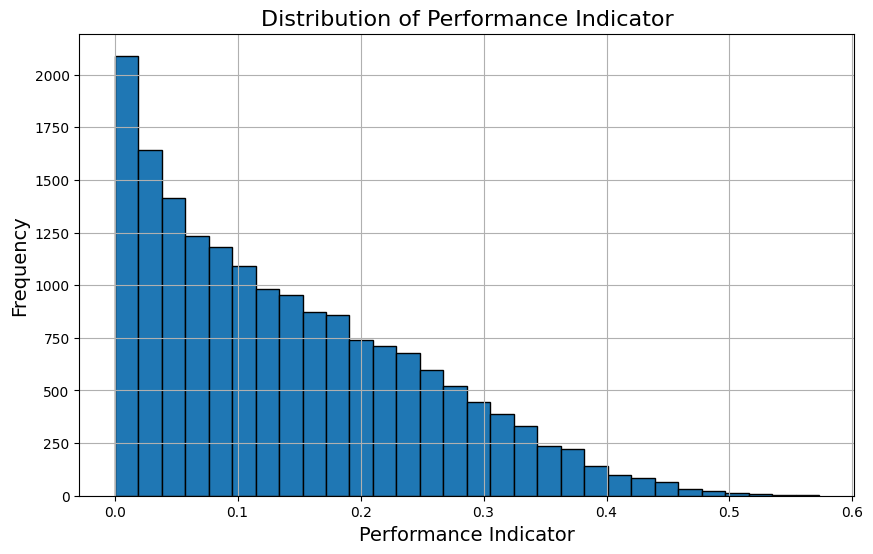

In [4]:
# List of relevant fields
fields = ["FG", "2PA", "3PA", "AST", "BLK", "STL", "ORB", "DRB", "TRB", "MP"]

# Normalize the fields using Min-Max scaling
scaler = MinMaxScaler()
normalized_stats = scaler.fit_transform(seasons_stats_df[fields])

# Assign arbitrary weights to each field (you can adjust these based on domain knowledge)
weights = {
    "FG": 0.2,  # Field Goals
    "2PA": 0.1,  # 2-Point Attempts
    "3PA": 0.15,  # 3-Point Attempts
    "AST": 0.15,  # Assists
    "BLK": 0.1,  # Blocks
    "STL": 0.1,  # Steals
    "ORB": 0.05,  # Offensive Rebounds
    "DRB": 0.05,  # Defensive Rebounds
    "TRB": 0.05,  # Total Rebounds
    "MP": 0.05  # Minutes Played
}

# Map weights to available fields
selected_weights = np.array([weights[field] for field in fields])

# Compute the performance indicator as a weighted sum of normalized stats
performance_indicator = np.dot(normalized_stats, selected_weights)

# Add the performance indicator to the DataFrame
seasons_stats_df["Performance_Indicator"] = performance_indicator

# Plot the distribution of the performance indicator
plt.figure(figsize=(10, 6))
plt.hist(performance_indicator, bins=30, edgecolor='black')
plt.title("Distribution of Performance Indicator", fontsize=16)
plt.xlabel("Performance Indicator", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(True)

# Display the top players by performance indicator
top_players = seasons_stats_df[["Player", "Performance_Indicator"]].sort_values(by="Performance_Indicator", ascending=False).head(10)
top_players

### 2.3 Hypothesis Tests

Examine the following hypothesis tests using the methods discussed in class, such as ANOVA, t-tests, A-B testing, Pearson and Spearman correlations. Make sure to provide p-values for each experiment and thoroughly justify your conclusions.

* Hypothesis 1: Player performance has significantly increased over time.

* Hypothesis 2: The average height and weight of NBA players has increased significantly over time.

* Hypothesis 3: Players from *Kentucky* college have a higher performance than players from other colleges.

* Hypothesis 4: There is a significant correlation between a player's height and their average points per game.

Hypothesis 1: ANOVA p-value = 3.406523630319138e-91


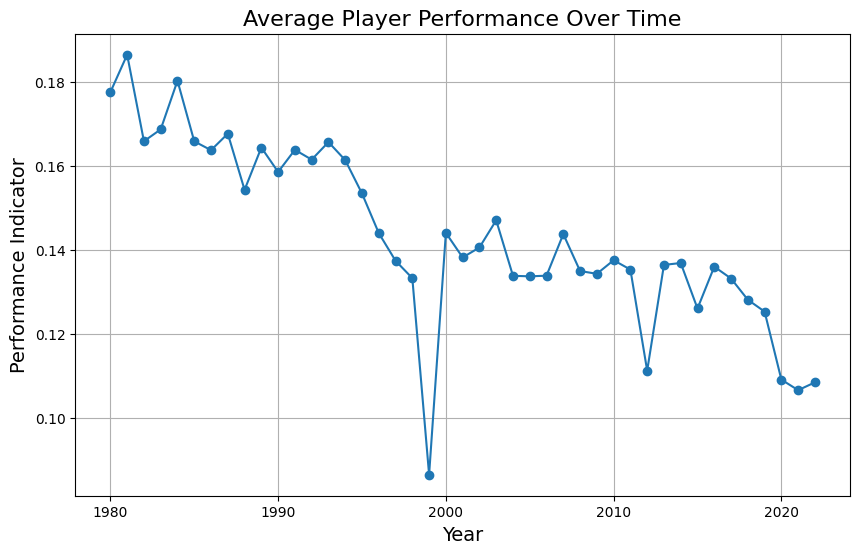

In [5]:
seasons_stats_df = seasons_stats_df.merge(player_data_df, on='Player', how='inner')

### Hypothesis 1: Player performance has significantly increased over time ###
# Group data by year and calculate average performance
performance_over_years = seasons_stats_df.groupby('Year')['Performance_Indicator'].mean()

# Plot performance over time
plt.figure(figsize=(10, 6))
plt.plot(performance_over_years.index, performance_over_years.values, marker='o')
plt.title('Average Player Performance Over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Performance Indicator', fontsize=14)
plt.grid(True)

# Perform a one-way ANOVA test (comparing performances across years)
years = seasons_stats_df['Year'].unique()
performance_groups = [seasons_stats_df[seasons_stats_df['Year'] == year]['Performance_Indicator'] for year in years]
anova_result = f_oneway(*performance_groups)
print(f"Hypothesis 1: ANOVA p-value = {anova_result.pvalue}")

p-value = 3.406523630319138e-91 << 0.05, there is evidence to suggest a significant causal relationship between height and the performance metric (performance, time).

Hypothesis 2: Height t-test p-value = 0.08009511278300055
Hypothesis 2: Weight t-test p-value = 2.4526310545965698e-65


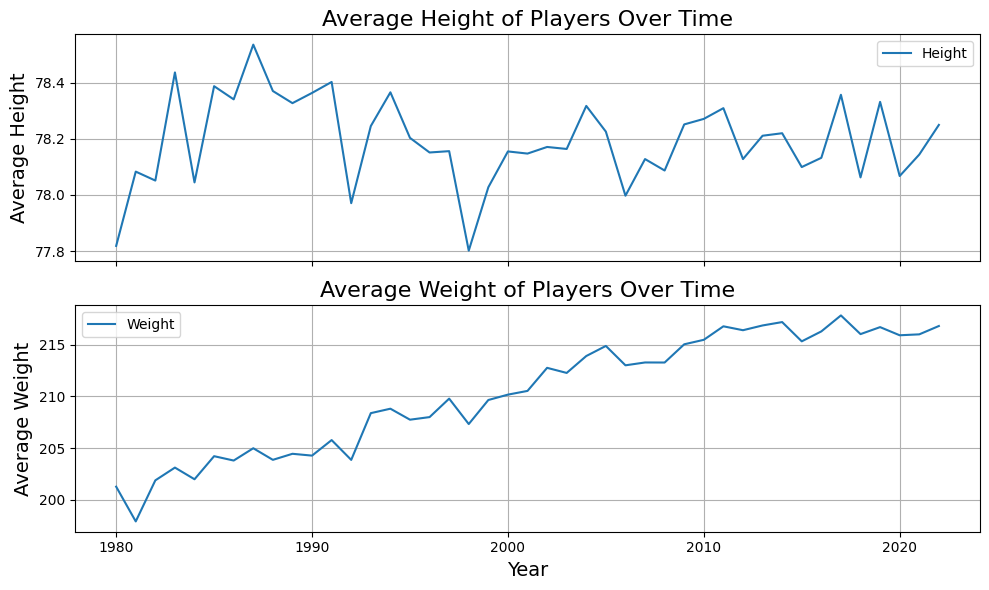

In [9]:
### Hypothesis 2: The average height and weight of NBA players has increased over time ###
# Group by year and calculate average height and weight
height_over_years = seasons_stats_df.groupby('Year')['Ht'].mean()
weight_over_years = seasons_stats_df.groupby('Year')['Wt'].mean()

# Create individual subplots for height and weight
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot average height over years
axs[0].plot(height_over_years.index, height_over_years.values, label='Height')
axs[0].set_title('Average Height of Players Over Time', fontsize=16)
axs[0].set_ylabel('Average Height', fontsize=14)
axs[0].legend()
axs[0].grid(True)

# Plot average weight over years
axs[1].plot(weight_over_years.index, weight_over_years.values, label='Weight')
axs[1].set_title('Average Weight of Players Over Time', fontsize=16)
axs[1].set_xlabel('Year', fontsize=14)
axs[1].set_ylabel('Average Weight', fontsize=14)
axs[1].legend()
axs[1].grid(True)

# Adjust layout
plt.tight_layout()

# Perform t-tests comparing early years to recent years
early_years = seasons_stats_df[seasons_stats_df['Year'] < 1990]
recent_years = seasons_stats_df[seasons_stats_df['Year'] >= 1990]
height_ttest = ttest_ind(early_years['Ht'], recent_years['Ht'])
weight_ttest = ttest_ind(early_years['Wt'], recent_years['Wt'])

# Print t-test results
print(f"Hypothesis 2: Height t-test p-value = {height_ttest.pvalue}")
print(f"Hypothesis 2: Weight t-test p-value = {weight_ttest.pvalue}")

p-value = 2.4526310545965698e-65 << 0.05, there is evidence to suggest a significant causal relationship between height and the performance metric (heigh, weight, time).

Hypothesis 3: Kentucky vs Others t-test p-value = 8.886640287705798e-05


Text(0, 0.5, 'Performance Indicator')

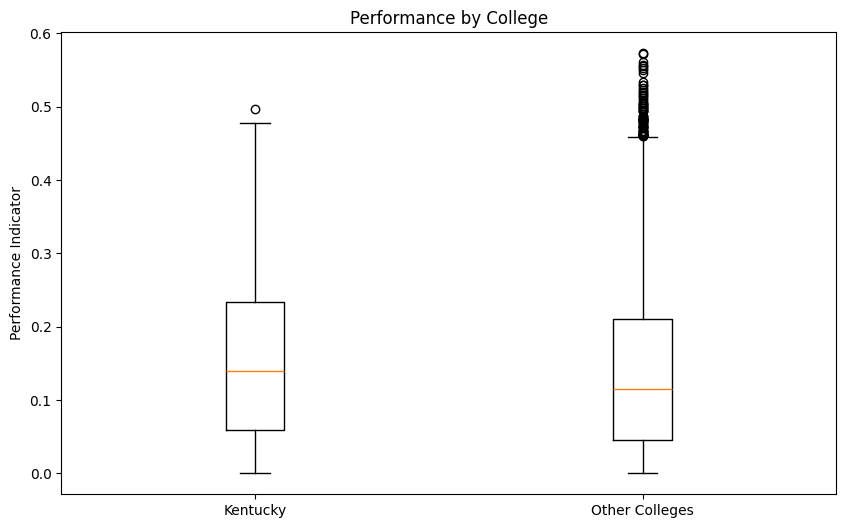

In [10]:
### Hypothesis 3: Players from Kentucky college have higher performance ###
# Separate players from Kentucky and others
kentucky_players = seasons_stats_df[seasons_stats_df['Colleges'] == 'Kentucky']
other_players = seasons_stats_df[seasons_stats_df['Colleges'] != 'Kentucky']

# Perform a t-test on the performance indicator
kentucky_ttest = ttest_ind(kentucky_players['Performance_Indicator'], other_players['Performance_Indicator'])
print(f"Hypothesis 3: Kentucky vs Others t-test p-value = {kentucky_ttest.pvalue}")

# Plot performance by college
plt.figure(figsize=(10, 6))
plt.boxplot([kentucky_players['Performance_Indicator'], other_players['Performance_Indicator']], labels=["Kentucky", "Other Colleges"])
plt.title("Performance by College")
plt.ylabel("Performance Indicator")

p-value = 8.886640287705798e-05 << 0.05, there is evidence to suggest a significant causal relationship between height and the performance metric (performance, college).

Hypothesis 4 Pearson p-value: 4.098518410907127e-08, Spearman p-value: 0.0007498252255436841


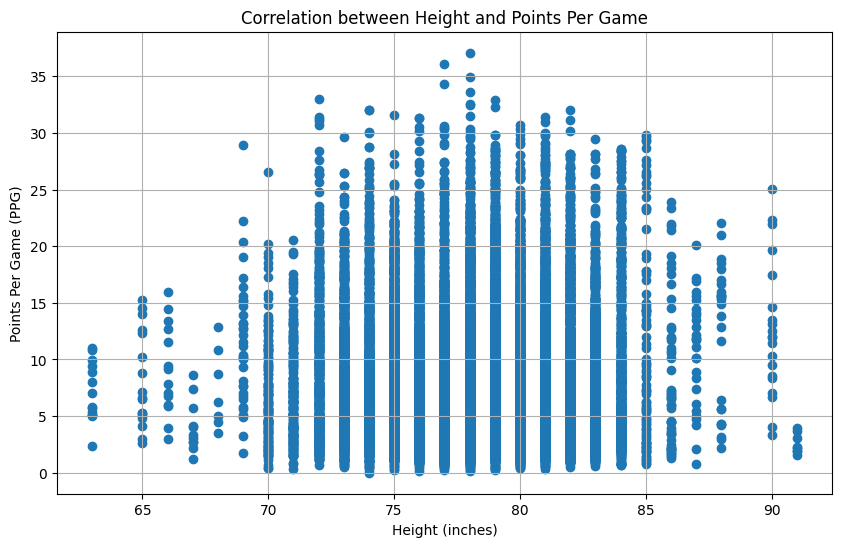

In [51]:
### Hypothesis 4: Correlation between a player's height and average points per game ###

# Add a column for Points Per Game (PPG) if not already present
seasons_stats_df["PPG"] = seasons_stats_df["PTS"] / seasons_stats_df["G"]

# Calculate Pearson and Spearman correlations
pearson_corr, p_val4_pearson = pearsonr(seasons_stats_df["Ht"], seasons_stats_df["PPG"])
spearman_corr, p_val4_spearman = spearmanr(seasons_stats_df["Ht"], seasons_stats_df["PPG"])
print(f"Hypothesis 4 Pearson p-value: {p_val4_pearson}, Spearman p-value: {p_val4_spearman}")

# Plot Correlation between Height and Points Per Game
plt.figure(figsize=(10, 6))
plt.scatter(seasons_stats_df["Ht"], seasons_stats_df["PPG"])
plt.title("Correlation between Height and Points Per Game")
plt.xlabel("Height (inches)")
plt.ylabel("Points Per Game (PPG)")
plt.grid(True)

p-value = 0.0007498252255436841 << 0.05, there is evidence to suggest a significant causal relationship between height and the performance metric (height, PPG).